# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "李澤諺"
student_id = "B05902023"

---

# Exercise 1 - Bisection

### Use the bisection method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define a function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        return np.cosh(x) + np.cos(x) - c
    return f

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1

### 2. Implement the algorithm

In [5]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    a = interval[0]
    b = interval[1]
    
    assert func(a) * func(b) < 0
    
    iteration = 0
    history = {'estimation' : [] , 'error' : []}
    while True:
        x = (a + b) / 2
        error = (b - a) / 2
        
        history['estimation'].append(x)
        history['error'].append(error)
        
        iteration += 1
        if (iteration >= max_iterations or error < tolerance):
            return (x , history) if report_history else x
        
        (a , b) = (a , x) if (func(a) * func(x) < 0) else (x , b)

Test your implementation with the assertion below.

In [6]:
root = bisection(lambda x: x**2 - x - 1, [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

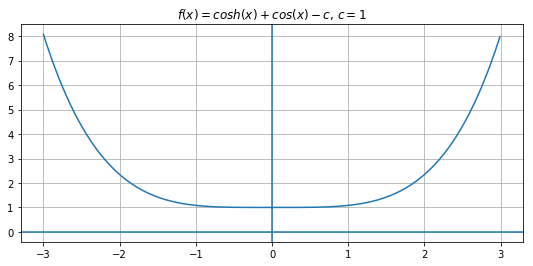

In [7]:
c = 1
f = g(c)

search_range = np.arange(-3 , 3 , 0.01)

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
root = None

In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

因為 $\forall\ x \in \mathbb{R}$，皆有  
$coshx + cosx - 1\\
= \frac{e^{x} + e^{-x}}{2} + cosx - 1\\
= \frac{1}{2}(\sum_{n = 0}^{\infty} \frac{x^n}{n!} + \sum_{n = 0}^{\infty} \frac{(-x)^n}{n!}) + \sum_{n = 0}^{\infty} (-1)^n\frac{x^n}{(2n)!} - 1\\
= \frac{1}{2}((1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \frac{x^6}{6!} + \frac{x^7}{7!} + \cdots) + (1 - x + \frac{x^2}{2!} - \frac{x^3}{3!} + \frac{x^4}{4!} - \frac{x^5}{5!} + \frac{x^6}{6!} - \frac{x^7}{7!} + \cdots)) + (1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots) - 1\\
= 1 + 2(\frac{x^4}{4!} + \frac{x^8}{8!} + \frac{x^{12}}{12!} + \cdots) \ge 1$  
所以 $coshx + cosx - 1 = 0$ 無解  
(或是由上圖也可以直接看出 $coshx + cosx - 1 = 0$ 無解)

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

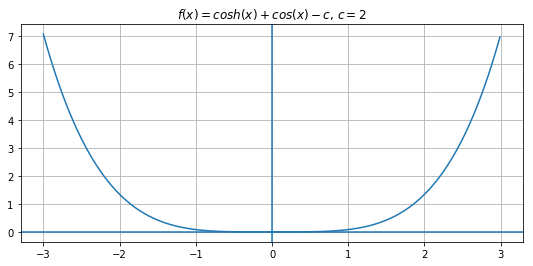

In [10]:
c = 2
f = g(c)

search_range = np.arange(-3 , 3 , 0.01)

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [11]:
root = 0

In [12]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

因為 $\forall\ x \in \mathbb{R}$，皆有  
$coshx + cosx - 2\\
= \frac{e^{x} + e^{-x}}{2} + cosx - 2\\
= \frac{1}{2}(\sum_{n = 0}^{\infty} \frac{x^n}{n!} + \sum_{n = 0}^{\infty} \frac{(-x)^n}{n!}) + \sum_{n = 0}^{\infty} (-1)^n\frac{x^n}{(2n)!} - 2\\
= \frac{1}{2}((1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \frac{x^6}{6!} + \frac{x^7}{7!} + \cdots) + (1 - x + \frac{x^2}{2!} - \frac{x^3}{3!} + \frac{x^4}{4!} - \frac{x^5}{5!} + \frac{x^6}{6!} - \frac{x^7}{7!} + \cdots)) + (1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots) - 2\\
= 2(\frac{x^4}{4!} + \frac{x^8}{8!} + \frac{x^{12}}{12!} + \cdots) \ge 0$  
所以不存在 $[a , b] \subset \mathbb{R}$ 使得 $f(a) \cdot f(b) < 0$  
(或是由上圖也可以直接看出不存在 $[a , b] \subset \mathbb{R}$ 使得 $f(a) \cdot f(b) < 0$)  
所以無法使用bisection method求出 $coshx + cosx - 2 = 0$ 的根

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

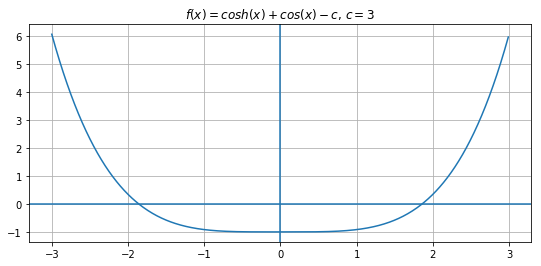

In [13]:
c = 3
f = g(c)

search_range = np.arange(-3 , 3 , 0.01)

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [14]:
root = (-1.8 , 1.8)

In [15]:
print('My estimation of root:', root)


My estimation of root: (-1.8, 1.8)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [16]:
(x , history) = bisection(func = g(3) , interval = [1 , 2] , max_iterations = 100 , tolerance = 1e-10 , report_history = True)

Estimation of root by bisection method: 1.8579208291484974


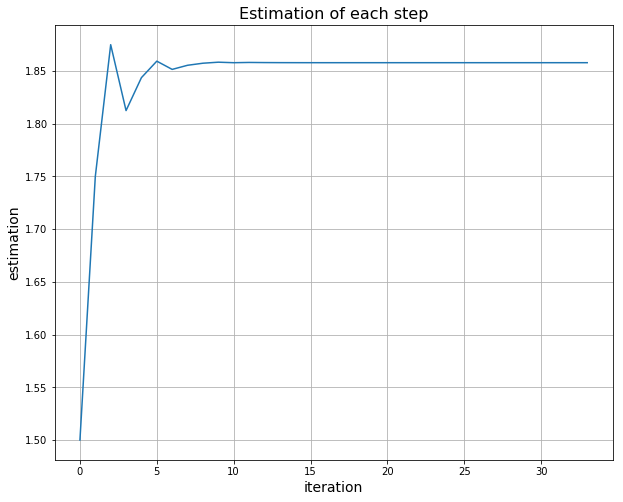

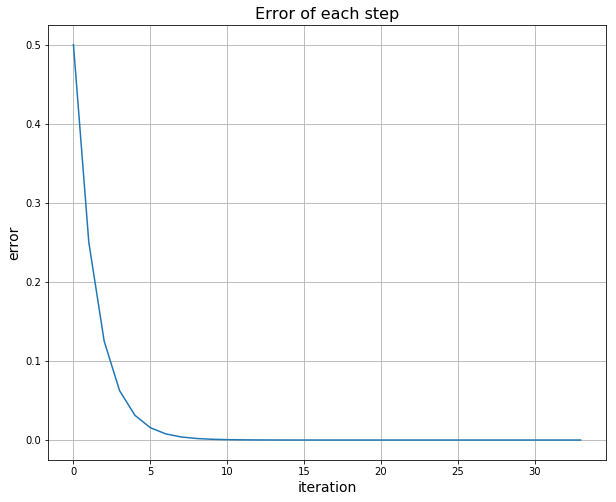

In [17]:
print('Estimation of root by bisection method:' , x)

plt.figure(figsize = (10 , 8))
plt.title('Estimation of each step' , fontsize = 16)
plt.plot(history['estimation'])
plt.xlabel('iteration' , fontsize = 14)
plt.ylabel('estimation' , fontsize = 14)
plt.grid(True)
plt.show()

plt.figure(figsize = (10 , 8))
plt.title('Error of each step' , fontsize = 16)
plt.plot(history['error'])
plt.xlabel('iteration' , fontsize = 14)
plt.ylabel('error' , fontsize = 14)
plt.grid(True)
plt.show()

In [18]:
(x , history) = bisection(func = g(3) , interval = [-2 , -1] , max_iterations = 100 , tolerance = 1e-10 , report_history = True)

Estimation of root by bisection method: -1.8579208291484974


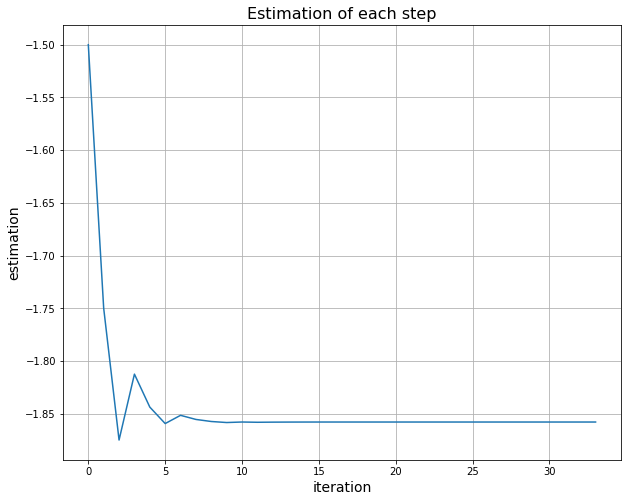

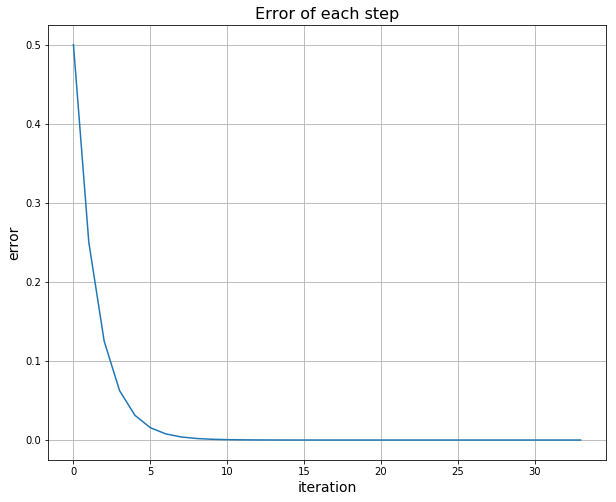

In [19]:
print('Estimation of root by bisection method:' , x)

plt.figure(figsize = (10 , 8))
plt.title('Estimation of each step' , fontsize = 16)
plt.plot(history['estimation'])
plt.xlabel('iteration' , fontsize = 14)
plt.ylabel('estimation' , fontsize = 14)
plt.grid(True)
plt.show()

plt.figure(figsize = (10 , 8))
plt.title('Error of each step' , fontsize = 16)
plt.plot(history['error'])
plt.xlabel('iteration' , fontsize = 14)
plt.ylabel('error' , fontsize = 14)
plt.grid(True)
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

當 $c = 1$ 時，方程式無解。  
當 $c = 2$ 時，因為不存在 $[a, b] \subset {\mathbb R}$ 使得 $f(a) \cdot f(b) < 0$，所以無法使用bisection method求出方程式的根。  
當 $c = 3$ 時，由上圖大致可以看出 $|x_{n + 1} - \alpha| \le C|x_n - \alpha|$ ，其中 $0 \le C < 1$，故estimation為linearly converge(其與理論中bisection method的rate of convergence相符)。